In [1]:
from analysis_SIM_generate_fun import *

# SIM -Demos

In [2]:
######################################
########## SIM -Demos ################
######################################
def SIM_demos():
    import sys

    sys.path.append('.')

    # from utilities import set_rcParams
    # set_rcParams()

    #forward
    data = generate_forward(gene_num=6, alpha=15, beta=20, gamma=18, sample=1000, noise_level=0.5)
    data_g1 = data[data['gene_list']=="simulation000"]
    plt.scatter(data_g1['s0'], data_g1['u0'], c=data_g1['alpha'], s=1)
    plt.show()

    #backward
    data = generate_backward(gene_num=6, alpha=15, beta=10, gamma=12, sample=1000, noise_level=0.2)
    data_g1 = data[data['gene_list']=="simulation000"]
    plt.scatter(data_g1['s0'], data_g1['u0'], c=data_g1['alpha'], s=1)
    plt.show()

    #two stage alpha
    data = generate_onepath(gene_num=6, alpha1=15, alpha2=30, beta1=10, beta2=10, gamma1=12, gamma2=12, path1_pct=99, path2_pct=99, path1_sample=1000, path2_sample=1000, noise_level=0.2)
    data_g1 = data[data['gene_list']=="simulation000"]
    plt.scatter(data_g1['s0'], data_g1['u0'], c=data_g1['alpha'], s=1)
    plt.show()

    #multiple path
    data = generate_multipath(gene_num=6, alpha1=18, alpha2=30, beta1=10, beta2=10, gamma1=12, gamma2=12, path1_pct=99, path2_pct=90, path1_sample=1000, path2_sample=1000, noise_level=0.2)
    data_g1 = data[data['gene_list']=="simulation000"]
    plt.scatter(data_g1['s0'], data_g1['u0'], c=data_g1['alpha'], s=1)
    plt.show()

    #circle: including normal, early switch, and early stop
    data = generate_onepath(gene_num=6, alpha1=15, alpha2=0, beta1=10, beta2=3, gamma1=12, gamma2=4, path1_pct=99, path2_pct=99, path1_sample=1000, path2_sample=1000, noise_level=0.2)
    data_g1 = data[data['gene_list']=="simulation000"]
    plt.scatter(data_g1['s0'], data_g1['u0'], c=data_g1['alpha'], s=1)
    plt.show()

    #float circle (not started from 0,0)
    data = generate_float_circle(gene_num=6, alpha1=15, alpha2=6, beta1=10, beta2=10, gamma1=12, gamma2=12, path1_pct=99, path2_pct=99, path1_sample=1000, path2_sample=1000, noise_level=0.2)
    data_g1 = data[data['gene_list']=="simulation000"]
    plt.scatter(data_g1['s0'], data_g1['u0'], c=data_g1['alpha'], s=1)
    plt.show()


    #generate by alpha, beta, gamma of each cell
    data = generate_onepath(gene_num=6, alpha1=15, alpha2=0, beta1=10, beta2=3, gamma1=12, gamma2=4, path1_pct=99, path2_pct=99, path1_sample=1000, path2_sample=1000, noise_level=0.2)
    data_g1 = data[data['gene_list']=="simulation000"]
    data_g1 = data_g1[['alpha', 'beta', 'gamma']]
    data_cell = generate_by_each_cell(data_g1, t=3, noise_level=0.2)

    plt.scatter(data_cell.t, data_cell.alpha, s=1)
    plt.xlabel("t")
    plt.ylabel("alpha")
    plt.show()
    plt.scatter(data_cell.t, data_cell.beta, s=1)
    plt.xlabel("t")
    plt.ylabel("beta")
    plt.show()
    plt.scatter(data_cell.t, data_cell.gamma, s=1)
    plt.xlabel("t")
    plt.ylabel("gamma")
    plt.show()
    plt.scatter(data_cell['s0'], data_cell['u0'], c=data_cell['alpha'], s=1)
    plt.xlabel("s")
    plt.ylabel("u")
    plt.show()
    
    generate_2circle()
    generate_2backward()
    generate_2backward2()
######################################
########## END - SIM -Demos ##########
######################################

# SIM - Multipath

In [75]:
def SIM_multi_path():
#     ############## finding range
#     # info: beta Longitudinal narrowing
#     # info: gamma Horizontally flatten
#     # alpha: size

    ############## generating multi_path_sim
    def gen_multi_path_sim(path1_sample,ratio):
        genn_amt=1
        
        alpha1=4
        beta1=1
        gamma1=4
        alpha2=1
        beta2=1
        gamma2=0.25
        
        alpha1_list= np.random.uniform(low=alpha1*0.9, high=alpha1*1.1, size=(genn_amt,)) #upper side
        beta1_list=[1]*genn_amt# np.random.uniform(low=0.15, high=0.35, size=(genn_amt,)) #upper side
        gamma1_list=np.random.uniform(low=gamma1*0.9, high=gamma1*1.1, size=(genn_amt,)) #
        alpha2_list=np.random.uniform(low=alpha2*0.9, high=alpha2*1.1, size=(genn_amt,)) #downside
        beta2_list=[1]*genn_amt# np.random.uniform(low=0.9, high=1.1, size=(genn_amt,)) #downside
        gamma2_list=np.random.uniform(low=gamma2*0.9, high=gamma2*1.1, size=(genn_amt,)) #downside
        
        path1_pct=50
        path2_pct=99

        i=0
        data_df=pd.DataFrame()
        for alpha1,alpha2,beta1,beta2,gamma1,gamma2 in zip(alpha1_list,alpha2_list,beta1_list,beta2_list,gamma1_list,gamma2_list):
            data = generate_multipath(gene_num=1, alpha1=alpha1, alpha2=alpha2, beta1=beta1, beta2=beta2, gamma1=gamma1, gamma2=gamma2, path1_pct=path1_pct, path2_pct=path2_pct, path1_sample=path1_sample, path2_sample=int(path1_sample/ratio), noise_level=0.2)
            
            # print(i)
            data.loc[:,'gene_name'] = 'simulation'+str(i)
            data_df=data_df.append(data)
            # plt.scatter(data_g1['s0'], data_g1['u0'], c=data_g1['alpha'], s=1)
            # plt.title('alpha('+str(alpha1)+','+str(alpha2)+')_beta('+str(beta1)+','+str(beta2)+')_gamma('+str(gamma1)+','+str(gamma2)+')_pathpct('+str(path1_pct)+','+str(path2_pct)+')')
            # plt.axis('scaled')
            # plt.show()
            i=i+1
            #if i % 100 == 0:
        data_df.to_csv(('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/simulation/data0606_for_publication/multi_path/raw/multi_path_Path1Upper_('+str(path1_sample)+')__R'+str(ratio)+'.csv'),index=False)
    ratio_list=[0.2,0.4,0.6,0.8,1]
    # ratio_list=[1]

    path1_sample=1000 #upper
    for ratio in ratio_list:
        print(ratio)
        gen_multi_path_sim(path1_sample,ratio)
SIM_multi_path()

0.2
0.4
0.6
0.8
1


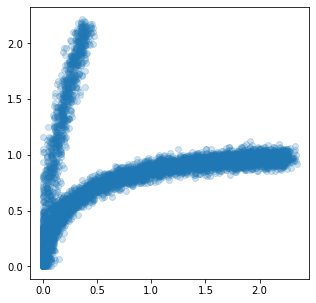

In [76]:
df=pd.read_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/simulation/data0606_for_publication/multi_path/raw/multi_path_Path1Upper_(1000)__R0.2.csv')
gene_list=list(df.gene_name.drop_duplicates())
for gene in gene_list:
    plt.figure(figsize=(5,5))
    onegene=df[df.gene_name==gene]
    plt.scatter(onegene.splice,onegene.unsplice,alpha=0.2)
    plt.show()

In [27]:
%load_ext autoreload
%autoreload 2

import os
import glob
import random
import sys
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
#srcdir = '/Users/pengzhizhang/cellDancer/src'
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
#srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
# srcdir = '/Users/chen.weiqing/Documents/GitHub/cellDancer/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer.velocity_estimation import velocity
from celldancer.compute_cell_velocity import compute
from celldancer.pseudo_time import pseudo_time
from celldancer.embedding_kinetic_para import embedding

save_path=None
df=pd.read_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/simulation/data0606_for_publication/multi_path/raw/multi_path_Path1Upper_(1000)__R0.8.csv')
loss_df, cellDancer_df=velocity(df,\
                             # max_epoches=max_epoches,\
                             # check_val_every_n_epoch=check_val_every_n_epoch,\
                             # patience=patience,\
                             # permutation_ratio=permutation_ratio,\
                             # speed_up=speed_up,\
                             # norm_u_s=norm_u_s,\
                             # norm_cell_distribution=norm_cell_distribution,\
                             n_jobs=6,\
                             save_path=save_path)
cellDancer_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/SIM_sl/cell_dancer_velocity_2022-06-07 15-10-24 as the output path.
Arranging genes for parallel job.
10  genes were arranged to  2  portions.



Velocity Estimation: 100%|██████████| 2/2 [00:04<00:00,  2.17s/it]                                                                                                                                         
                                                                                                                                                                                                           

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,simulation8,0.113982,0.020651,0.263044,0.054039,0.104901,3.352977,0.292741,0.019387,0,NaN,0.015806,0.000000
1,1,simulation8,0.000000,0.055680,0.160611,0.052689,0.084520,3.377722,0.280576,0.019387,1,NaN,0.025356,0.000000
2,2,simulation8,0.090107,0.000000,0.244653,0.027315,0.102250,3.353650,0.294183,0.019387,2,NaN,0.074402,0.018121
3,3,simulation8,0.048873,0.072567,0.199501,0.083557,0.090677,3.372378,0.281266,0.019387,3,NaN,0.052905,0.019097
4,4,simulation8,0.192436,0.000000,0.338948,0.058021,0.121539,3.335577,0.300805,0.019387,4,NaN,0.000000,0.011762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,2245,simulation6,1.048060,2.317292,1.025375,2.581478,0.241726,3.726381,0.074906,0.019671,2245,NaN,0.956944,2.541013
22496,2246,simulation6,0.961248,2.374715,0.906404,2.616130,0.205136,3.738706,0.070642,0.019671,2246,NaN,1.193388,2.527320
22497,2247,simulation6,0.926353,2.338483,0.864115,2.570083,0.192977,3.739839,0.071431,0.019671,2247,NaN,1.011256,2.576859
22498,2248,simulation6,0.993548,2.275803,0.952647,2.524919,0.219461,3.729264,0.075540,0.019671,2248,NaN,1.102540,2.644339


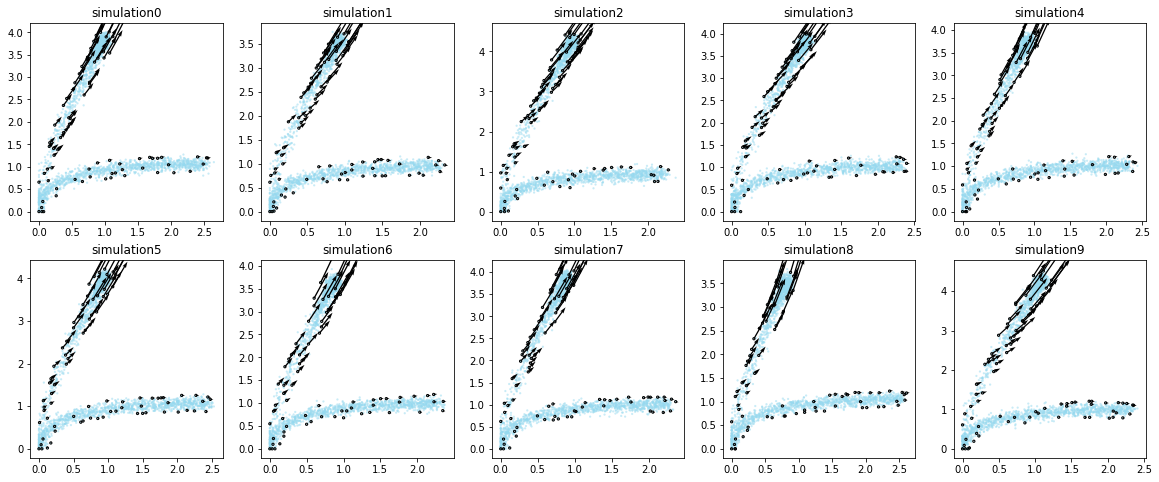

In [28]:
%autoreload 2

gene_list=list(df.gene_name.drop_duplicates())[0:10]

ncols=5
height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=None,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    # ax.axis('off')

plt.show()

# SIM - Wings

In [57]:
def SIM_wing_path():
    def gen_wing_path_sim(path2_sample,ratio):
        genn_amt=5#1000
        
        alpha1=5
        beta1=1
        gamma1=0.5
        alpha2=10
        beta2=1
        gamma2=0.5
        
        alpha1_list= np.random.uniform(low=alpha1*0.9, high=alpha1*1.1, size=(genn_amt,)) #upper side
        beta1_list=[beta1]*genn_amt# np.random.uniform(low=0.15, high=0.35, size=(genn_amt,)) #upper side
        gamma1_list=[gamma2]*genn_amt
        alpha2_list=np.random.uniform(low=alpha2*0.9, high=alpha2*1.1, size=(genn_amt,)) #downside
        beta2_list=[beta2]*genn_amt# np.random.uniform(low=0.9, high=1.1, size=(genn_amt,)) #downside
        gamma2_list=[gamma2]*genn_amt
        
        path1_pct_list=[99.999]*genn_amt#np.random.uniform(low=100, high=100, size=(genn_amt,))
        path2_pct_list=[90]*genn_amt#np.random.uniform(low=100, high=100, size=(genn_amt,))

        i=0
        data_df=pd.DataFrame()
        for alpha1,alpha2,beta1,beta2,gamma1,gamma2,path1_pct,path2_pct in zip(alpha1_list,alpha2_list,beta1_list,beta2_list,gamma1_list,gamma2_list,path1_pct_list,path2_pct_list):
            data = generate_onepath(gene_num=1, alpha1=alpha1, alpha2=alpha2, beta1=beta1, beta2=beta2, gamma1=gamma1, gamma2=gamma2, path1_pct=path1_pct, path2_pct=path2_pct, path1_sample=int(path2_sample/ratio), path2_sample=path2_sample, noise_level=0.2)
            data.gene_name = 'simulation'+str(i)
            i=i+1
            if i % 100 == 0:print(i)
                
            dir_name='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/simulation/data0606_for_publication/wing_path/raw/wing_path_Path2Upper_'+str(path2_sample)+'__R'+str(ratio)+'.csv'
            
            if i==1:
                data.to_csv(dir_name,index=False)
            else:
                data.to_csv(dir_name,index=False,mode='a',header=False)
                
                
    ratio_list=[0.2]#[0.2,0.4,0.6]
    path2_sample=1000#1000 #from (0,0) # 
    for ratio in ratio_list:
        # print(ratio)
        gen_wing_path_sim(path2_sample,ratio)
SIM_wing_path()

In [74]:
df

,gene_name,unsplice,splice,embedding1,embedding2,alpha,beta,gamma,path1_pct,path2_pct,cellID,clusters
0,simulation0,0.102157,0.008852,0.102157,0.008852,5.256194,1.0,0.5,99.999,90,0,NaN
1,simulation0,0.030368,0.000000,0.030368,0.000000,5.256194,1.0,0.5,99.999,90,1,NaN
2,simulation0,0.000000,0.000000,0.000000,0.000000,5.256194,1.0,0.5,99.999,90,2,NaN
3,simulation0,0.136708,0.000000,0.136708,0.000000,5.256194,1.0,0.5,99.999,90,3,NaN
4,simulation0,0.059835,0.000000,0.059835,0.000000,5.256194,1.0,0.5,99.999,90,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
54995,simulation4,9.275021,15.147670,9.275021,15.147670,9.664634,1.0,0.5,99.999,90,10995,NaN
54996,simulation4,8.867507,14.643218,8.867507,14.643218,9.664634,1.0,0.5,99.999,90,10996,NaN
54997,simulation4,9.351502,14.375470,9.351502,14.375470,9.664634,1.0,0.5,99.999,90,10997,NaN
54998,simulation4,9.367451,15.105114,9.367451,15.105114,9.664634,1.0,0.5,99.999,90,10998,NaN


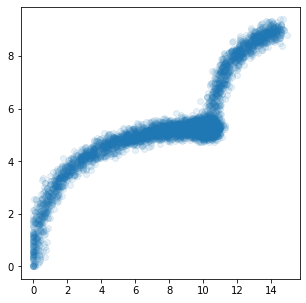

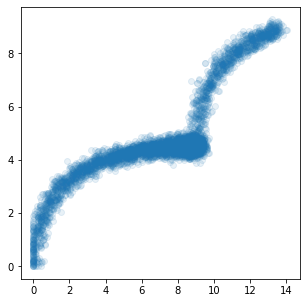

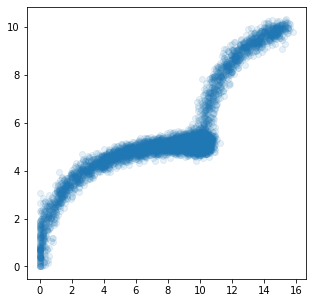

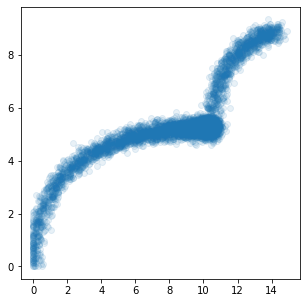

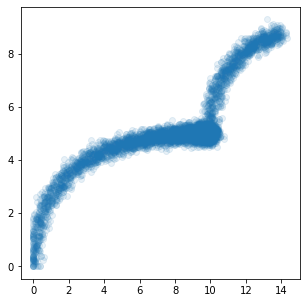

In [58]:
df=pd.read_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/simulation/data0606_for_publication/wing_path/raw/wing_path_Path2Upper_1000__R0.2.csv')
gene_list=list(df.gene_name.drop_duplicates())
for gene in gene_list:
    plt.figure(figsize=(5,5))
    onegene=df[df.gene_name==gene]
    plt.scatter(onegene.splice,onegene.unsplice,alpha=0.1)
    plt.show()

In [81]:
df=df.rename(columns={"u0": "unsplice", "s0": "splice","gene_list": "gene_name"})
df.loc[:,'cellID']=list(range(2000))*50
df.loc[:,'clusters']=None
df

,gene_name,unsplice,splice,embedding1,embedding2,alpha,beta,gamma,path1_pct,path2_pct,cellID,clusters
0,simulation0,0.000000,1.960510,0.000000,1.960510,11.0,1.0,0.125,99.999,99.999,0,None
1,simulation0,0.123038,0.000000,0.123038,0.000000,11.0,1.0,0.125,99.999,99.999,1,None
2,simulation0,0.000000,0.044821,0.000000,0.044821,11.0,1.0,0.125,99.999,99.999,2,None
3,simulation0,0.133597,0.000000,0.133597,0.000000,11.0,1.0,0.125,99.999,99.999,3,None
4,simulation0,0.000000,0.000000,0.000000,0.000000,11.0,1.0,0.125,99.999,99.999,4,None
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,simulation49,30.960875,105.997770,30.960875,105.997770,30.0,1.0,0.273,99.999,99.999,1995,None
99996,simulation49,29.269659,107.688610,29.269659,107.688610,30.0,1.0,0.273,99.999,99.999,1996,None
99997,simulation49,29.869005,105.336740,29.869005,105.336740,30.0,1.0,0.273,99.999,99.999,1997,None
99998,simulation49,29.785328,109.074020,29.785328,109.074020,30.0,1.0,0.273,99.999,99.999,1998,None


In [82]:
%load_ext autoreload
%autoreload 2

import os
import glob
import random
import sys
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
#srcdir = '/Users/pengzhizhang/cellDancer/src'
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
#srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
# srcdir = '/Users/chen.weiqing/Documents/GitHub/cellDancer/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer.velocity_estimation import velocity
from celldancer.compute_cell_velocity import compute
from celldancer.pseudo_time import pseudo_time
from celldancer.embedding_kinetic_para import embedding
save_path=None
loss_df, cellDancer_df=velocity(df,\
                             # max_epoches=max_epoches,\
                             # check_val_every_n_epoch=check_val_every_n_epoch,\
                             # patience=patience,\
                             # permutation_ratio=permutation_ratio,\
                             # speed_up=speed_up,\
                             # norm_u_s=norm_u_s,\
                             # norm_cell_distribution=norm_cell_distribution,\
                             n_jobs=8,\
                             save_path=save_path)
cellDancer_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/SIM_sl/cell_dancer_velocity_2022-06-07 13-55-06 as the output path.
Arranging genes for parallel job.
50  genes were arranged to  7  portions.



Velocity Estimation: 100%|██████████| 7/7 [00:42<00:00,  5.16s/it]                                                                                                                                         
                                                                                                                                                                                                           

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,simulation15,0.540753,0.000000,2.972650,0.831540,0.167960,27.977646,16.483046,0.078650,0,None,0.000000,1.960510
1,1,simulation15,0.842194,1.563589,3.179168,2.743047,0.170342,27.988228,16.500372,0.078650,1,None,0.123038,0.000000
2,2,simulation15,0.000000,4.745582,2.316591,4.393802,0.145737,28.089907,16.471462,0.078650,2,None,0.000000,0.044821
3,3,simulation15,0.000000,0.895282,2.458689,0.828956,0.154677,28.023432,16.461527,0.078650,3,None,0.133597,0.000000
4,4,simulation15,0.000000,0.000000,2.492971,0.000000,0.156833,28.007812,16.459242,0.078650,4,None,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1995,simulation18,30.058838,104.999250,32.493710,140.603000,0.954844,27.673380,20.921423,0.059592,1995,None,30.290632,101.354095
99996,1996,simulation18,30.908669,110.029785,32.548573,146.530910,0.929914,27.732592,20.957989,0.059592,1996,None,30.512247,105.080160
99997,1997,simulation18,29.612762,109.411390,32.166170,143.926770,0.950276,27.672955,20.933586,0.059592,1997,None,29.802635,107.832130
99998,1998,simulation18,29.812695,105.237460,32.414993,140.432050,0.958364,27.662672,20.918040,0.059592,1998,None,29.281015,107.174300


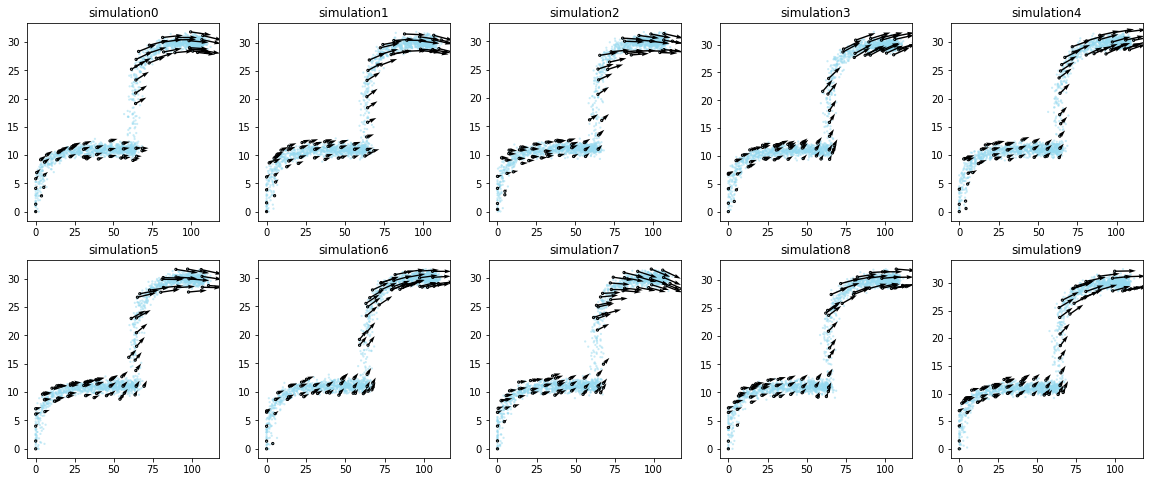

In [83]:
%autoreload 2

gene_list=list(df.gene_name.drop_duplicates())[0:10]

ncols=5
height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=None,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    # ax.axis('off')

plt.show()

# SIM - backward

,unsplice,splice,u1,s1,alpha,beta,gamma,embedding1,embedding2,cellID,clusters
0,1.109990,4.092049,0.999000,3.997000,0,1,1,1.109990,4.092049,0,None
1,0.819414,3.742791,0.953100,3.858184,0,1,1,0.819414,3.742791,1,None
2,0.777851,3.622656,0.909310,3.723686,0,1,1,0.777851,3.622656,2,None
3,1.010562,3.595258,0.867511,3.593434,0,1,1,1.010562,3.595258,3,None
4,0.836287,3.605198,0.827584,3.467365,0,1,1,0.836287,3.605198,4,None
...,...,...,...,...,...,...,...,...,...,...,...
193,0.007332,0.187563,0.048105,0.248331,0,1,1,0.007332,0.187563,193,None
194,0.155911,0.274404,0.045896,0.239080,0,1,1,0.155911,0.274404,194,None
195,0.000000,0.213380,0.043788,0.230155,0,1,1,0.000000,0.213380,195,None
196,0.014854,0.224164,0.041777,0.221545,0,1,1,0.014854,0.224164,196,None


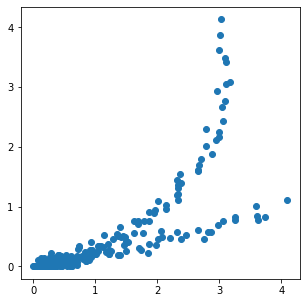

In [14]:
start_s1=4 #downside
start_u1=1
alpha1=0
beta1=1
gamma1=1
path1_sample=99

start_s2=3
start_u2=4
alpha2=0
beta2=1
gamma2=1
path2_sample=99

df=generate_backward(start_s1, start_s2, start_u1, start_u2, alpha1,alpha2,beta1, beta2, gamma1, gamma2, path1_sample, path2_sample,noise_level=0.2)
plt.figure(figsize=(5,5))
plt.scatter(df.splice,df.unsplice)
df

In [65]:
def SIM_back_path():
    def gen_back_path_sim(path2_sample,ratio):
        genn_amt=1#1000
        
        start_s1=4 #downside
        start_u1=1
        alpha1=0
        beta1=1
        gamma1=1

        start_s2=3
        start_u2=4
        alpha2=0
        beta2=1
        gamma2=1

        start_s1_list=np.random.uniform(low=start_s1*0.9, high=start_s1*1.1, size=(genn_amt,))
        start_u1_list=np.random.uniform(low=start_u1*0.9, high=start_u1*1.1, size=(genn_amt,)) 
        alpha1_list= [alpha1]*genn_amt #upper side
        beta1_list=[beta1]*genn_amt# np.random.uniform(low=0.15, high=0.35, size=(genn_amt,)) #upper side
        gamma1_list=np.random.uniform(low=gamma1*0.9, high=gamma1*1.1, size=(genn_amt,))#[gamma2]*genn_amt

        start_s2_list=np.random.uniform(low=start_s2*0.9, high=start_s2*1.1, size=(genn_amt,))
        start_u2_list=np.random.uniform(low=start_u2*0.9, high=start_u2*1.1, size=(genn_amt,)) 
        alpha2_list=[alpha2]*genn_amt
        beta2_list=[beta2]*genn_amt
        gamma2_list=np.random.uniform(low=gamma2*0.9, high=gamma2*1.1, size=(genn_amt,)) #[gamma2]*genn_amt
        
        path1_pct_list=[90]*genn_amt#np.random.uniform(low=100, high=100, size=(genn_amt,))
        path2_pct_list=[90]*genn_amt#np.random.uniform(low=100, high=100, size=(genn_amt,))

        i=0
        data_df=pd.DataFrame()
        for start_s1,start_s2,start_u1,start_u2, alpha1,alpha2,beta1,beta2,gamma1,gamma2 in zip(start_s1_list,start_s2_list,start_u1_list,start_u2_list, alpha1_list,alpha2_list,beta1_list,beta2_list,gamma1_list,gamma2_list):
            data = generate_backward(start_s1, start_s2, start_u1, start_u2,alpha1=alpha1, alpha2=alpha2, beta1=beta1, beta2=beta2, gamma1=gamma1, gamma2=gamma2, path1_sample=int(path2_sample/ratio), path2_sample=path2_sample, noise_level=0.2)
            data.loc[:,'gene_name'] = 'simulation'+str(i)
            i=i+1
            if i % 100 == 0:print(i)
                
            dir_name='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/simulation/data0606_for_publication/back_path/raw/back_path_Path2Upper_'+str(path2_sample)+'__R'+str(ratio)+'.csv'
            
            if i==1:
                data.to_csv(dir_name,index=False)
            else:
                data.to_csv(dir_name,index=False,mode='a',header=False)
                
    ratio_list=[0.1]
    path2_sample=1000#1000 #from (0,0) # 
    for ratio in ratio_list:
        # print(ratio)
        gen_back_path_sim(path2_sample,ratio)
SIM_back_path()

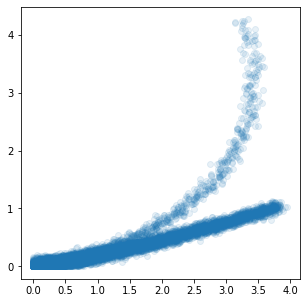

,unsplice,splice,u1,s1,alpha,beta,gamma,embedding1,embedding2,cellID,clusters,gene_name
0,1.032704,3.820129,1.047603,3.797720,0,1,1.018674,1.032704,3.820129,0,NaN,simulation0
1,1.032413,3.947785,1.047120,3.796420,0,1,1.018674,1.032413,3.947785,1,NaN,simulation0
2,1.057725,3.687080,1.046638,3.795120,0,1,1.018674,1.057725,3.687080,2,NaN,simulation0
3,1.006165,3.688840,1.046156,3.793821,0,1,1.018674,1.006165,3.688840,3,NaN,simulation0
4,1.044146,3.800147,1.045673,3.792522,0,1,1.018674,1.044146,3.800147,4,NaN,simulation0
...,...,...,...,...,...,...,...,...,...,...,...,...
10995,0.000000,0.175881,0.043226,0.261964,0,1,0.953390,0.000000,0.175881,10995,NaN,simulation0
10996,0.128503,0.212942,0.043027,0.261012,0,1,0.953390,0.128503,0.212942,10996,NaN,simulation0
10997,0.021458,0.370774,0.042829,0.260063,0,1,0.953390,0.021458,0.370774,10997,NaN,simulation0
10998,0.066175,0.223504,0.042631,0.259117,0,1,0.953390,0.066175,0.223504,10998,NaN,simulation0


In [66]:
df=pd.read_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/simulation/data0606_for_publication/back_path/raw/back_path_Path2Upper_1000__R0.1.csv')
gene_list=list(df.gene_name.drop_duplicates())
for gene in gene_list:
    plt.figure(figsize=(5,5))
    onegene=df[df.gene_name==gene]
    plt.scatter(onegene.splice,onegene.unsplice,alpha=0.1)
    plt.show()
df

In [61]:
%load_ext autoreload
%autoreload 2

import os
import glob
import random
import sys
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
#srcdir = '/Users/pengzhizhang/cellDancer/src'
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
#srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
# srcdir = '/Users/chen.weiqing/Documents/GitHub/cellDancer/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer.velocity_estimation import velocity
from celldancer.compute_cell_velocity import compute
from celldancer.pseudo_time import pseudo_time
from celldancer.embedding_kinetic_para import embedding
save_path=None
loss_df, cellDancer_df=velocity(df,\
                             # max_epoches=max_epoches,\
                             # check_val_every_n_epoch=check_val_every_n_epoch,\
                             # patience=patience,\
                             # permutation_ratio=permutation_ratio,\
                             # speed_up=speed_up,\
                             # norm_u_s=norm_u_s,\
                             # norm_cell_distribution=norm_cell_distribution,\
                             n_jobs=8,\
                             save_path=save_path)
cellDancer_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/SIM_sl/cell_dancer_velocity_2022-06-07 17-55-34 as the output path.
Arranging genes for parallel job.
5  genes were arranged to  1  portion.



Velocity Estimation: 100%|██████████| 1/1 [00:04<00:00,  4.26s/it]                                                                                                                                         
                                                                                                                                                                                                           

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,simulation2,1.052431,3.605566,0.582744,2.340822,0.002260,3.997445,3.461734,0.010845,0,NaN,0.973980,3.773633
1,1,simulation2,1.001745,3.709838,0.552079,2.373107,0.001846,4.014464,3.474066,0.010845,1,NaN,1.059279,3.800355
2,2,simulation2,1.017692,3.698858,0.561308,2.373914,0.001920,4.011499,3.472291,0.010845,2,NaN,0.904436,3.802914
3,3,simulation2,0.840674,3.558260,0.463337,2.233746,0.001654,4.016630,3.466846,0.010845,3,NaN,0.943858,3.863883
4,4,simulation2,0.977115,3.745917,0.537561,2.381354,0.001700,4.021001,3.478627,0.010845,4,NaN,0.928679,3.841085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1995,simulation4,0.122412,0.173722,0.106917,0.152001,0.015443,3.548893,3.437745,0.010169,1995,NaN,0.000000,0.242670
9996,1996,simulation4,0.096558,0.289603,0.085905,0.210796,0.013009,3.571451,3.455207,0.010169,1996,NaN,0.029238,0.401960
9997,1997,simulation4,0.104845,0.183721,0.095011,0.151063,0.014817,3.553573,3.440967,0.010169,1997,NaN,0.000000,0.116824
9998,1998,simulation4,0.029254,0.000000,0.052375,0.011461,0.015882,3.538117,3.426061,0.010169,1998,NaN,0.153320,0.067829


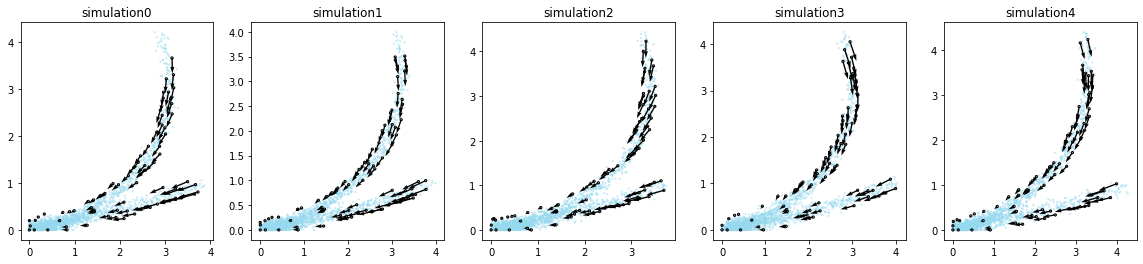

In [62]:
%autoreload 2

gene_list=list(df.gene_name.drop_duplicates())[0:10]

ncols=5
height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=None,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    # ax.axis('off')

plt.show()